In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set(style="whitegrid")

In [8]:
excel_file = "miRNA semantic similarity - threshold setting.xlsx"
xls = pd.ExcelFile(excel_file)

In [10]:
miRNA_dfs = [xls.parse(sheet) for sheet in xls.sheet_names]

In [12]:
miRNA_names = xls.sheet_names

In [14]:
merged_df = pd.concat(
    [df.set_index("Threshold").rename(columns={"Similarity": name}) for df, name in zip(miRNA_dfs, miRNA_names)],
    axis=1
).reset_index()

In [16]:
merged_df = merged_df.dropna()

In [18]:
merged_df["Mean"] = merged_df.iloc[:, 1:].mean(axis=1)
merged_df["STD"] = merged_df.iloc[:, 1:-1].std(axis=1)

In [20]:
x_common = merged_df["Threshold"]
mean_sim = merged_df["Mean"]
std_sim = merged_df["STD"]

Save as PNG? (yes/no):  yes


Saved as 'miRNA_similarity_SD.png'.


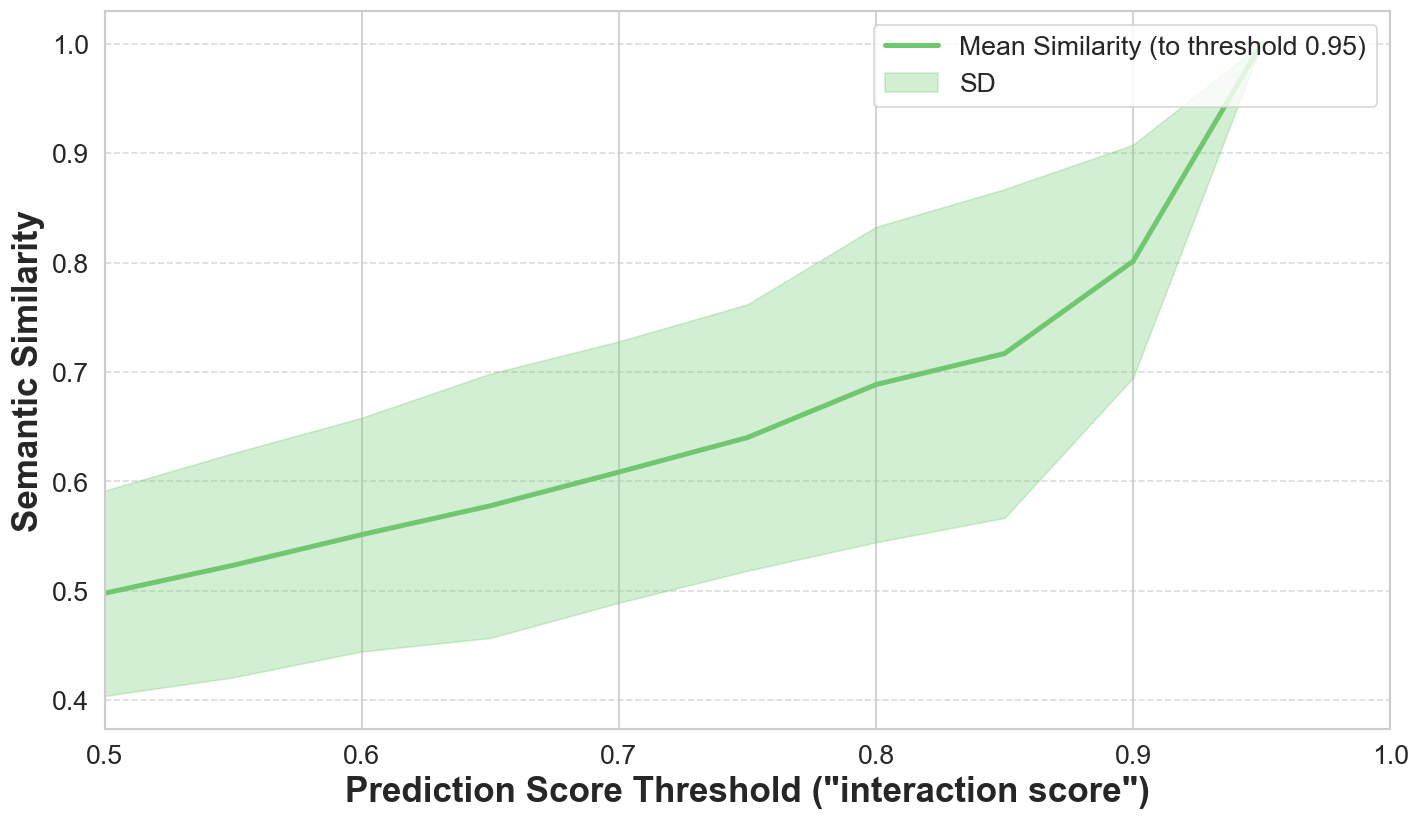

In [24]:
plt.figure(figsize=(12, 7), dpi=120)
plt.plot(x_common, mean_sim, color='#6fc76f', linewidth=3, label="Mean Similarity (to threshold 0.95)")
plt.fill_between(x_common, mean_sim - std_sim, mean_sim + std_sim, color='#6ecc6e', alpha=0.3, label="SD")
plt.xlabel('Prediction Score Threshold ("interaction score")', fontsize=21, fontweight="bold")
plt.ylabel('Semantic Similarity', fontsize=21, fontweight="bold")
plt.xlim(0.5, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=16, loc='upper right')
plt.tick_params(axis='both', labelsize=16)
plt.tight_layout()

save_plot = input("Save as PNG? (yes/no): ").strip().lower()
if save_plot == 'yes':
    plt.savefig("miRNA_threshold_similarity_SD.png", format='png', dpi=300, bbox_inches='tight')
    print("Saved as 'miRNA_similarity_SD.png'.")

plt.show()